PROJECT: PEER-TO-PEER LENDING: A CREDIT RISK ASSESSMENT USING MACHINE LEARNING 

This model will be developed using the conceptual framework proposed in my ERP. the process is highligted below.

##### Bondora Dataset ----> Data Pre-processing which invoolves, Feature selection ----> Data Conversion ---> Data balaning/feature engineering ---> Model Develoment


In [462]:

# IMPORT LIBRARIES.

import pandas as pd     # for data preprocessing 
import numpy as np      #linear algebra

# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
import seaborn as sns
palette_color = sns.color_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Feature selection using sklearn
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, mutual_info_classif, f_classif, SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer

# Next we import the libraries needed for the feature scaling.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Next we import the libraries needed for the train test split.
from sklearn.model_selection import train_test_split

## Import the logistic regression model 
from sklearn.linear_model import LogisticRegression

## Import the Decison Tree model 
from sklearn.tree import DecisionTreeClassifier

## Import the Random Forest model 
from sklearn.ensemble import RandomForestClassifier

# Import modules for MODEL EVALUATION 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Ignore depreciation warnings
import warnings
warnings.filterwarnings("ignore")  # I only use this because I have tested the code and there was no critcal warning to take account of



Number of rows: 125,785
Number of columns: 112


In [600]:

# Import the Data
df = pd.read_csv('LoanData_Bondora.csv', low_memory = False)
print (f"Number of rows: {df.shape[0]:,}\nNumber of columns: {df.shape[1]:,}")


In [463]:

df.head(3)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,15/08/2023,911AD132-DBA3-400F-B261-A858018745F6,752304,02/01/2018 18:29,02/01/2018 20:29,2566,0,125,{AEA8B07C-7F95-4308-ACCD-A440016AFB4A},True,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.39,180+
1,15/08/2023,4C5D929D-FF44-4C16-A823-A85900C10357,752439,02/01/2018 07:34,02/01/2018 09:34,8266,3,766,{2CF1B585-20D4-4F23-9F0B-A6D300A41E67},True,...,0.0,28/01/2019,26/04/2019,NaN,0.0,60.0,11/04/2019,0.0,2438.20,180+
2,15/08/2023,EAA9746C-ACEC-48C1-A555-A85900DB6BC2,752486,02/01/2018 06:26,02/01/2018 08:26,502,1,27,{9ABE136E-51D1-4568-990E-A525016A80B6},False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN


In [464]:
## WE NEED TO PERFORM SERIES OF DATA PRE-PROCESSING TO PREPARE OUR DATA FOR DATA ANALYSIS.
## DATA PRE-PROCESSING ...
# The first step of our data preprocessing is to check the percentage of missing value in our data to give is a better scale of 
# how many total missing values do we have?

total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_missing = round((total_missing/total_cells) * 100, 3)

print(f"Total number of cells in the data: {total_cells:,}\n\nTotal number of missing cells: {total_missing:,} ---> That amounts to {percent_missing}% of the data")


Total number of cells in the data: 14,087,920

Total number of missing cells: 3,713,948 ---> That amounts to 26.363% of the data


In [465]:
# Finding columns with a mean null values percentage above 40%
DropColList = df.columns[(df.isnull().mean()*100) >= 40].tolist()

# Displying columns with a mean null values percentage above 40%

columns_above_40 = len(df.columns[(df.isnull().mean()*100) >= 40])

print(f"The total number of columns with a mean null value percentage above 40% is: {columns_above_40}\nThe columns are listed below with the percentage of null values: \n")
print("----------------------------------------------")
for i,v in enumerate(df[DropColList].isnull().mean()):
    print(f"{DropColList[i]} ----> {v:.2%}", end="\n"*2)


The total number of columns with a mean null value percentage above 40% is: 41
The columns are listed below with the percentage of null values: 

----------------------------------------------
ContractEndDate ----> 53.53%

DateOfBirth ----> 100.00%

County ----> 100.00%

City ----> 100.00%

NrOfDependants ----> 100.00%

EmploymentPosition ----> 100.00%

WorkExperience ----> 100.00%

PlannedPrincipalTillDate ----> 96.17%

CurrentDebtDaysPrimary ----> 42.61%

DebtOccuredOn ----> 42.61%

CurrentDebtDaysSecondary ----> 41.96%

DebtOccuredOnForSecondary ----> 41.96%

DefaultDate ----> 46.58%

PlannedPrincipalPostDefault ----> 46.58%

PlannedInterestPostDefault ----> 46.58%

EAD1 ----> 46.58%

EAD2 ----> 46.58%

PrincipalRecovery ----> 46.58%

InterestRecovery ----> 46.58%

EL_V0 ----> 100.00%

Rating_V0 ----> 100.00%

EL_V1 ----> 100.00%

Rating_V1 ----> 100.00%

Rating_V2 ----> 100.00%

ActiveLateCategory ----> 43.46%

CreditScoreEsEquifaxRisk ----> 98.78%

CreditScoreFiAsiakasTietoRiskGra

In [466]:
## FEATURE SELECTION: Dropping none essential columns 

df_status = df.Status
df_default_date = df.DefaultDate

# Now we can remove columns having more than 40% missing values
df.drop(columns= DropColList, axis= 1, inplace=True)

## we will then proceed to drop all the feature (variables) that will not be needed for our model

df = df.drop(['LoanId','BidsPortfolioManager','BidsManual','PartyId','PrincipalPaymentsMade',
           'InterestAndPenaltyPaymentsMade',
           'PrincipalBalance','InterestAndPenaltyBalance',
           'NoOfPreviousLoansBeforeLoan','AmountOfPreviousLoansBeforeLoan',
            'Restructured',
           'WorseLateCategory','CreditScoreEsMicroL',
            'RecoveryStage','MonthlyPayment','StageActiveSince',
           'ModelVersion','Rating', 'LossGivenDefault','ExpectedReturn','PrincipalOverdueBySchedule',
            'PlannedInterestTillDate',
           'LastPaymentOn',
           'ExpectedLoss','ProbabilityOfDefault','EmploymentDurationCurrentEmployer',
           'IncomeFromPrincipalEmployer','IncomeFromPension','IncomeFromFamilyAllowance',
           'IncomeFromSocialWelfare','IncomeFromLeavePay', 'RefinanceLiabilities','FreeCash','MonthlyPaymentDay',
           'ActiveScheduleFirstPaymentReached','DebtToIncome','ExistingLiabilities', 'ReportAsOfEOD',
          'LoanNumber','ListedOnUTC','BiddingStartedOn','BidsApi','LoanApplicationStartedDate',
           'LoanDate','FirstPaymentDate','MaturityDate_Original','ApplicationSignedHour','ApplicationSignedHour',
          'ApplicationSignedWeekday','LanguageCode','IncomeFromChildSupport','IncomeOther',
          'PreviousEarlyRepaymentsCountBeforeLoan','Amount','MaturityDate_Last','OccupationArea'], axis = 1)


df["DefaultDate"] = df_default_date
df["Status"] = df_status

print (f"Number of rows: {df.shape[0]:,}\nNumber of columns: {df.shape[1]:,}\n\n")

df.head()
    

Number of rows: 125,785
Number of columns: 17




,NewCreditCustomer,VerificationType,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,UseOfLoan,Education,MaritalStatus,EmploymentStatus,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,Status,DefaultDate
0,True,1,46,0,FI,8930.0,23.38,60,-1,4,-1,-1,8,2667.0,735.74,Late,31/05/2018
1,True,1,47,0,FI,9035.0,18.94,60,-1,3,-1,-1,8,2153.0,948.68,Late,26/07/2019
2,False,1,48,0,EE,530.0,31.90,36,-1,3,-1,-1,1,950.0,24.24,Repaid,NaN
3,True,4,36,0,EE,3185.0,34.38,36,-1,1,-1,-1,3,900.0,0.00,Repaid,15/02/2019
4,False,4,45,0,FI,530.0,14.48,36,-1,5,-1,-1,8,2700.0,1888.51,Late,17/07/2018


In [467]:
#lets find the count of each status category

df.Status.value_counts()

Status
Repaid    69351
Late      56434
Name: count, dtype: int64

In [470]:
#Replace all null value by NoDefault in DefaultDate Column
df.DefaultDate.fillna('NoDefault', inplace = True)

# Replace any Date by Default
for i in range(len(df.DefaultDate.values)):
    if df.DefaultDate[i]!= 'NoDefault':
        df.DefaultDate[i] = 'Default'


# check the count of default and nodefault
df.DefaultDate.value_counts()


DefaultDate
Default      67191
NoDefault    58594
Name: count, dtype: int64

In [471]:
df.head()

,NewCreditCustomer,VerificationType,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,UseOfLoan,Education,MaritalStatus,EmploymentStatus,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,Status,DefaultDate
0,True,1,46,0,FI,8930.0,23.38,60,-1,4,-1,-1,8,2667.0,735.74,Late,Default
1,True,1,47,0,FI,9035.0,18.94,60,-1,3,-1,-1,8,2153.0,948.68,Late,Default
2,False,1,48,0,EE,530.0,31.90,36,-1,3,-1,-1,1,950.0,24.24,Repaid,NoDefault
3,True,4,36,0,EE,3185.0,34.38,36,-1,1,-1,-1,3,900.0,0.00,Repaid,Default
4,False,4,45,0,FI,530.0,14.48,36,-1,5,-1,-1,8,2700.0,1888.51,Late,Default


In [472]:
# lets remove the status column
df = df.drop(['Status'], axis = 1)

# Rename DefaultDate to LoanStatus so that LoanStatus is our Target Variable 
df.rename(columns ={'DefaultDate': 'LoanStatus'}, inplace = True)

df.dtypes


NewCreditCustomer       bool
VerificationType       int64
Age                    int64
Gender                 int64
Country               object
AppliedAmount        float64
Interest             float64
LoanDuration           int64
UseOfLoan              int64
Education              int64
MaritalStatus          int64
EmploymentStatus       int64
HomeOwnershipType      int64
IncomeTotal          float64
LiabilitiesTotal     float64
LoanStatus            object
dtype: object

In [473]:
# As we can see in numeric column distribution there are many columns which are present as numeric but they are 
# actually categorical as per data description such as Gender, UseOfLoan, Gender, Education, Marital Status,
#EmployementStatus etc.

#So we will convert these features to categorical features

#for Gender Column

df.Gender.value_counts()

# Repalce null values by undefined

df.Gender.fillna('Undefined', inplace = True)

# Convert from int types to string
df['Gender'] = df['Gender'].astype(object)

for i in range(len(df.Gender.values)):
    df.Gender.values[i] = str(df.Gender.values[i])
    
# from Bondora dataset we can find that :
# 0 Male, 1 Female, 2 undefined.
df.Gender = df.Gender.str.replace('0', 'Male')
df.Gender = df.Gender.str.replace('1', 'Female')
df.Gender = df.Gender.str.replace('2', 'Undefined')

#check

df.Gender.value_counts()

Gender
Male         76099
Female       40565
Undefined     9121
Name: count, dtype: int64

In [474]:
# for UseOfLoan

# Convert from int types to string
df['UseOfLoan'] = df['UseOfLoan'].astype(object)

for i in range(len(df.UseOfLoan.values)):
    df.UseOfLoan.values[i] = str(df.UseOfLoan.values[i])

#from Bondora dataset we can find that:
# -1 Notset.

df.UseOfLoan = df.UseOfLoan.str.replace('-1', 'Notset')

#check

df.UseOfLoan.value_counts()

UseOfLoan
Notset    125785
Name: count, dtype: int64

In [475]:
# we will repace null values

df.Education.fillna('Not Present', inplace = True)

# Convert from int types to string

df['Education'] = df['Education'].astype(object)

for i in range(len(df.Education.values)):
    df.Education.values[i] = str(df.Education.values[i])

#from Bondora dataset we can find that:
#  Notset.
# We will replace -1 by "Not Present".
## And from Bondora dataset and Bondora Statistics Page we can find that:
## 1 Primary education, 2 Basic education, 3 Vocational education, 4 Secondary education, 5 Higher education.

df.Education = df.Education.str.replace('-1',  'Not Present')
df.Education = df.Education.str.replace('1',   'Primary education')
df.Education = df.Education.str.replace('2',   'Basic education')
df.Education = df.Education.str.replace('3',   'Vocational education')
df.Education = df.Education.str.replace('4',   'Secondary education')
df.Education = df.Education.str.replace('5',   'Higher education')

#check

df.Education.value_counts()

Education
Secondary education     43015
Vocational education    33230
Higher education        29266
Primary education       17927
Not Present              1304
Basic education          1043
Name: count, dtype: int64

In [476]:
#Replace Null values by "Not Specified"
df.MaritalStatus.fillna('Not Specified', inplace = True)

# Convert from int types to string first
df.MaritalStatus = df.MaritalStatus.astype(object)

for i in range(len(df.MaritalStatus.values)):
    df.MaritalStatus.values[i] = str(df.MaritalStatus.values[i])
    
# Again Marital status of value -1 has no description so we will encode it as Not_specified
## And from Bondora dataser:
## 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow

df.MaritalStatus = df.MaritalStatus.str.replace('-1',  'Not Specified')

# Check
df.MaritalStatus.value_counts()


MaritalStatus
Not Specified    125785
Name: count, dtype: int64

In [477]:
#Replace Null values by "Not Present"
df.EmploymentStatus.fillna('Not Present', inplace = True)

# Convert from int types to string first
df.EmploymentStatus = df.EmploymentStatus.astype(object)

for i in range(len(df.EmploymentStatus.values)):
    df.EmploymentStatus.values[i] = str(df.EmploymentStatus.values[i])
    
# Again Employment Status of value -1 has no description so we will encode it as Not present
## And from Bondora dataset:

df.EmploymentStatus = df.EmploymentStatus.str.replace('-1',  'Not Present')

# Check
df.EmploymentStatus.value_counts()


EmploymentStatus
Not Present    125785
Name: count, dtype: int64

In [478]:
# Convert from int types to string first
df.NewCreditCustomer = df.NewCreditCustomer.astype(object)

for i in range(len(df.NewCreditCustomer.values)):
    df.NewCreditCustomer.values[i] = str(df.NewCreditCustomer.values[i])
    


In [479]:
# Replcae Null values by "Not specified"
df.HomeOwnershipType.fillna("Not specified", inplace = True)

# Convert from int types to string first
df.HomeOwnershipType = df.HomeOwnershipType.astype(object)

for i in range(len(df.HomeOwnershipType.values)):
    df.HomeOwnershipType.values[i] = str(df.HomeOwnershipType.values[i])

## We will replace -1 by "Not specified"
## And from the Bonora dataset we find : 1 Owner 2 Living with parents 3 Tenant,pre-furnished property
## 4 Tenant,unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 
#  9 Owner with encumbrance 10 Other

df.HomeOwnershipType = df.HomeOwnershipType.str.replace('-1', 'Not specified')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('1', 'Owner')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('2', 'Living with parents')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('3', 'Tenant,pre-furnished property')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('4', 'Tenant,pre-furnished property')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('5', 'Council house')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('6', 'Joint tenant')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('7', 'Joint ownership')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('8', 'Mortgage')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('9',  'Owner with encumbrance')
df.HomeOwnershipType = df.HomeOwnershipType.str.replace('10', 'Other')

# Check
df.HomeOwnershipType.value_counts()

HomeOwnershipType
Owner                            46705
Tenant,pre-furnished property    34867
Living with parents              17659
Mortgage                         12700
Owner0                           11973
Council house                     1032
Joint ownership                    517
Joint tenant                       185
Owner with encumbrance             145
Not specified                        2
Name: count, dtype: int64

In [482]:
df.head(3)

,NewCreditCustomer,VerificationType,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,UseOfLoan,Education,MaritalStatus,EmploymentStatus,HomeOwnershipType,IncomeTotal,LiabilitiesTotal,LoanStatus
0,True,1,46,Male,FI,8930.0,23.38,60,Notset,Secondary education,Not Specified,Not Present,Mortgage,2667.0,735.74,Default
1,True,1,47,Male,FI,9035.0,18.94,60,Notset,Vocational education,Not Specified,Not Present,Mortgage,2153.0,948.68,Default
2,False,1,48,Male,EE,530.0,31.90,36,Notset,Vocational education,Not Specified,Not Present,Owner,950.0,24.24,NoDefault


In [494]:
#thats complete our data cleaning process.
# Now that we have clean that data, next is to do exploratory data analysis (EDA)
# Now we can see the relationship between features and the target feature which is "LoanStatus":

## Categorical features distribution :

print("The columns in the dataset that are of type object or bool are: ", end="\n")
print("-----------------------------")
for column in df.select_dtypes([object, bool]).columns:
    print(column)

The columns in the dataset that are of type object or bool are: 
-----------------------------
NewCreditCustomer
Gender
Country
UseOfLoan
Education
MaritalStatus
EmploymentStatus
HomeOwnershipType
LoanStatus


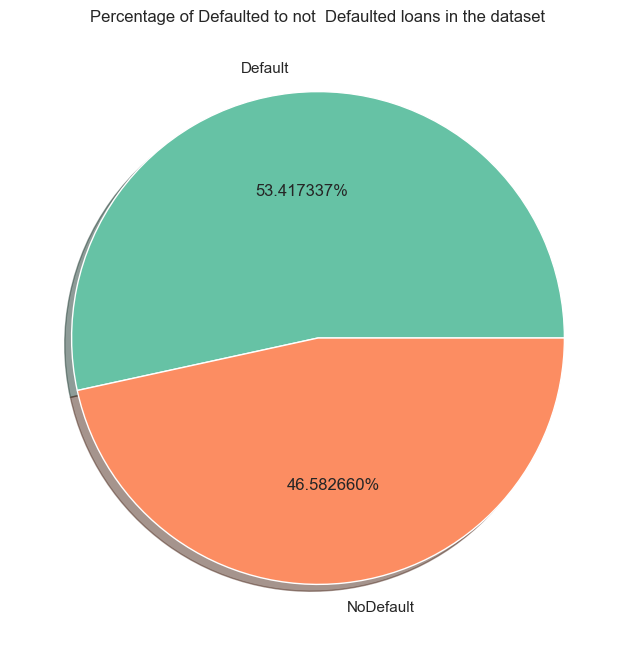

In [486]:
# Percentage of Defaulted loans in the dataset:

#plotting data on chart 
plt.pie(df.LoanStatus.value_counts().values, labels = df.LoanStatus.value_counts().index,
        explode =[0,0], colors = palette_color, autopct = '%1f%%',shadow = True)
plt.title('Percentage of Defaulted to not  Defaulted loans in the dataset')

# displaying chart
plt.show()

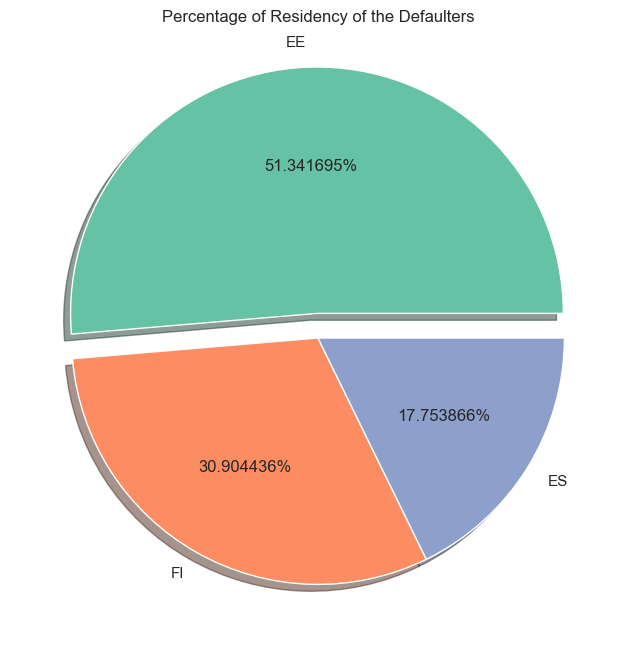

In [487]:
#Residency of the Defaulters :
# plotting data on chart
plt.pie(df.Country[df.LoanStatus == 'Default'].value_counts().values,
        labels = df.Country[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0.1,0,0], colors = palette_color, autopct ='%1f%%', shadow = True)
plt.title("Percentage of Residency of the Defaulters")

# displaying chart
plt.show()

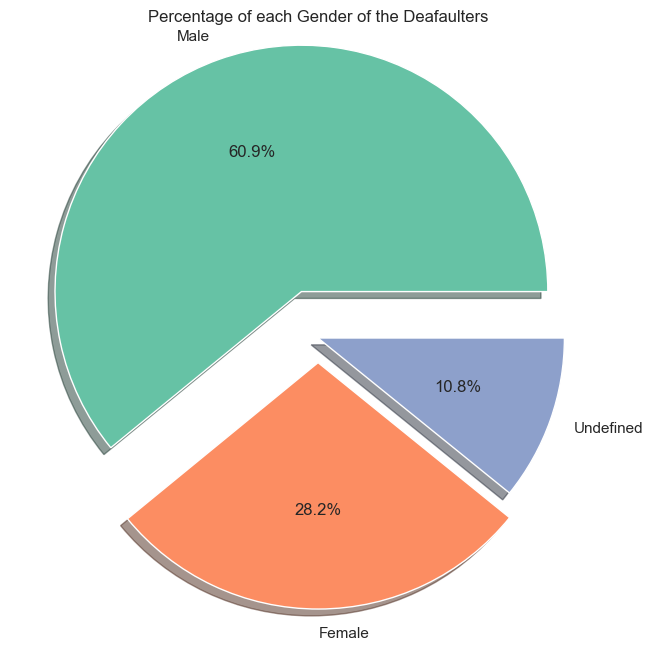

In [488]:
#Estonia has the most number of Defaulters.
# Next we check Gender distribution of defaulters

# plotting data on chart
plt.pie(df.Gender[df.LoanStatus == 'Default'].value_counts().values,
        labels = df.Gender[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0.2, 0.1, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of each Gender of the Deafaulters")

# displaying chart
plt.show()

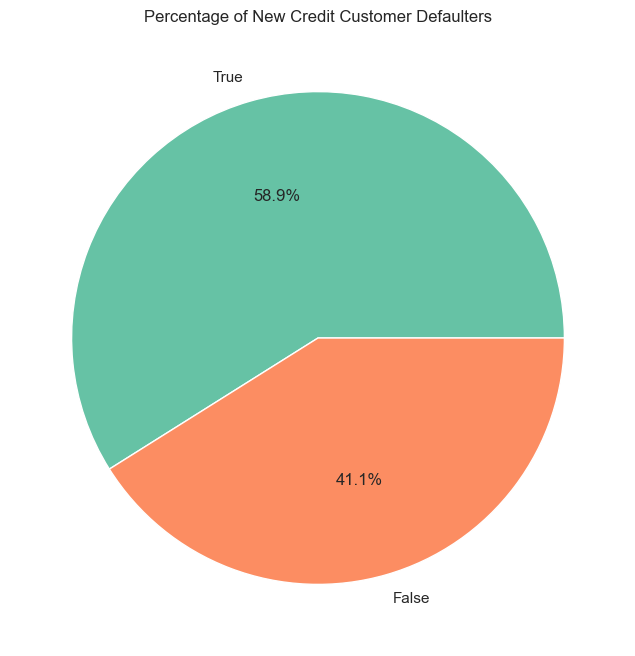

In [490]:
# We notice that the majority of the defaulters are Males.
# next we Check if the most Defaluters are New Credit Customers or not

# plotting data on chart
plt.pie(df.NewCreditCustomer[df.LoanStatus == 'Default'].value_counts().values,
        labels = df.NewCreditCustomer[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = False)
plt.title("Percentage of New Credit Customer Defaulters")

# displaying chart
plt.show()

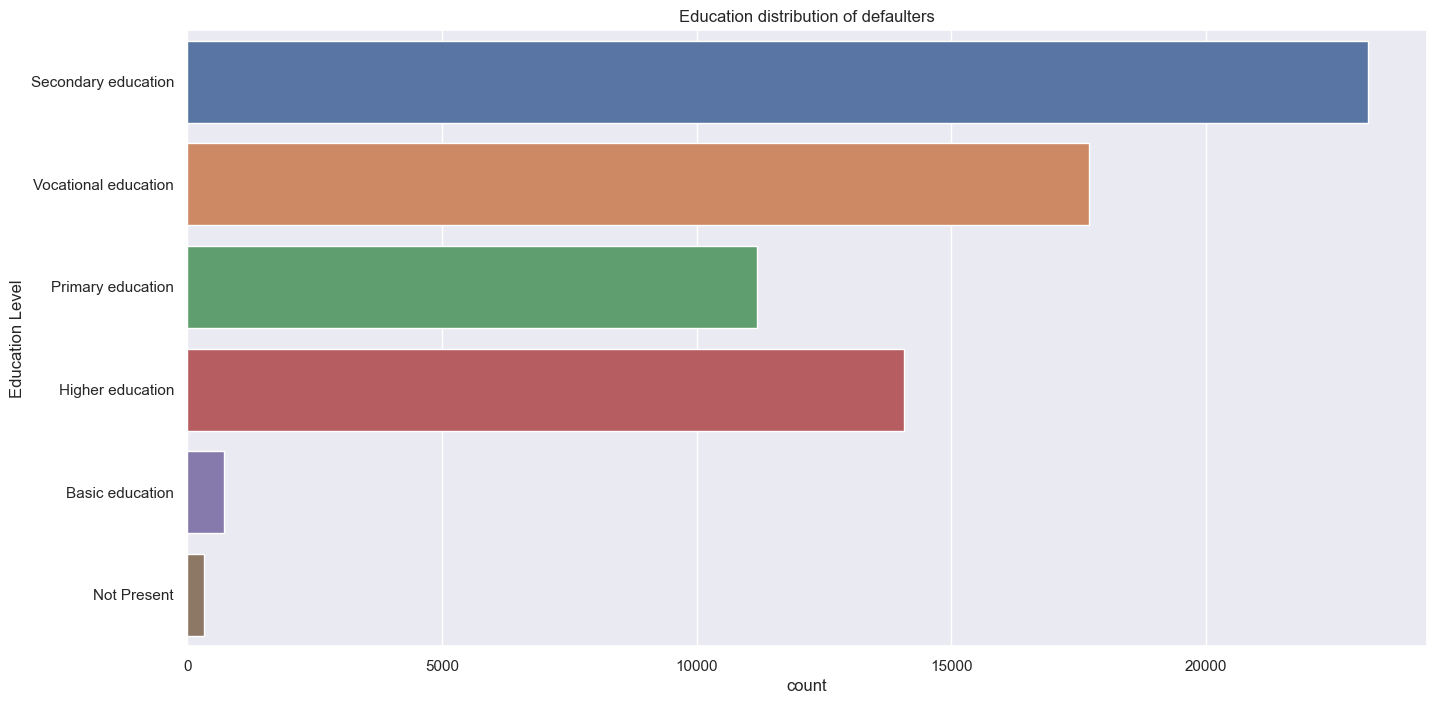

In [491]:
#We can see that most of the Defaulters are New Credit Users.
# Next we check Education wise distribution of defaulters :

sns.countplot(data=df, y = df.Education[df.LoanStatus == 'Default'])
plt.title('Education distribution of defaulters')
plt.ylabel('Education Level');

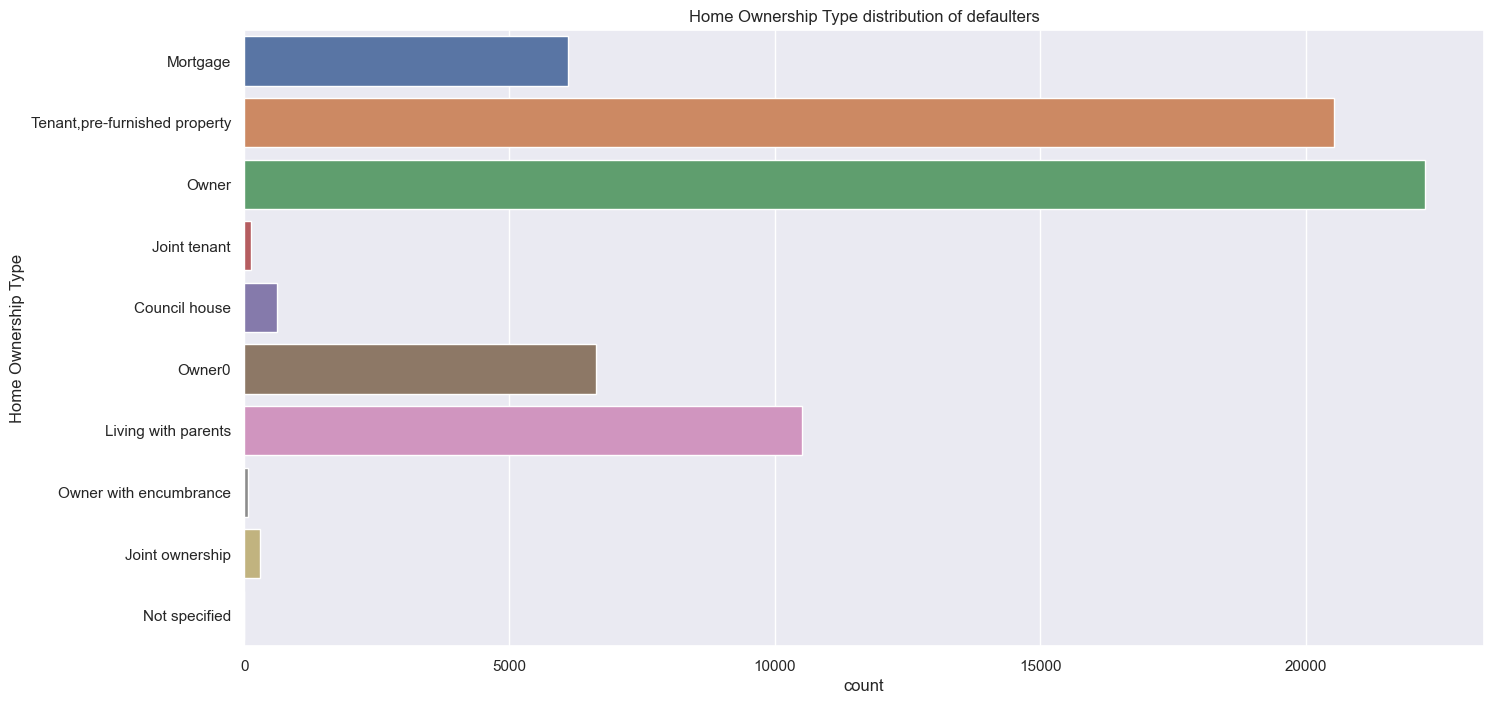

In [492]:
# Home Ownership Type of the Defaulters :

sns.countplot(data=df, y = df.HomeOwnershipType[df.LoanStatus == 'Default'])
plt.title('Home Ownership Type distribution of defaulters')
plt.ylabel('Home Ownership Type');

In [495]:
# Most defaulters are those who have a home, while the second most defaulted loans come from the borrowers who have Tenant, pre-furnished property.
# That’s really surprising that borrower having a home are defaulted the most.

# Numerical features distribution :

print("The columns in the dataset that are of type int or float are: ", end="\n")
print("-----------------------------")
for column in df.select_dtypes([int, float ]).columns:
    print(column)

The columns in the dataset that are of type int or float are: 
-----------------------------
VerificationType
Age
AppliedAmount
Interest
LoanDuration
IncomeTotal
LiabilitiesTotal


In [516]:
# Age distribution of the Defaulters :

age_index = df.Age[df.LoanStatus=='Default'].describe().index
age_value = df.Age[df.LoanStatus=='Default'].describe().values

print("The statisics of the age column are listed below: ")
print("--------------------")
for i in range(len(age_index)):
    print(f"{age_index[i]} -----> {int(age_value[i]):,}")

The statisics of the age column are listed below: 
--------------------
count -----> 67,191
mean -----> 40
std -----> 12
min -----> 18
25% -----> 30
50% -----> 39
75% -----> 50
max -----> 70


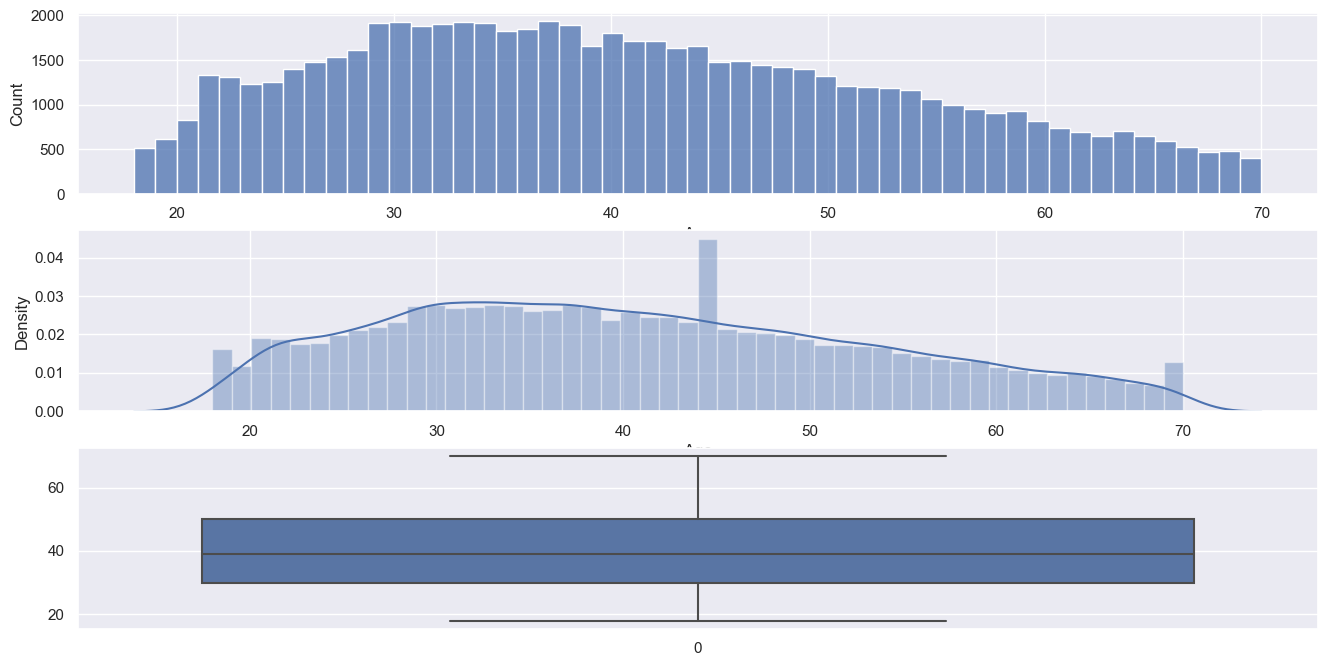

In [522]:
# Plotting the spread of Age of Defaulters
fig, axs = plt.subplots(nrows= 3);

sns.histplot(df.Age[df.LoanStatus=='Default'], ax=axs[0]);
sns.distplot(df.Age[df.LoanStatus=='Default'], ax=axs[1]);
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[2]);

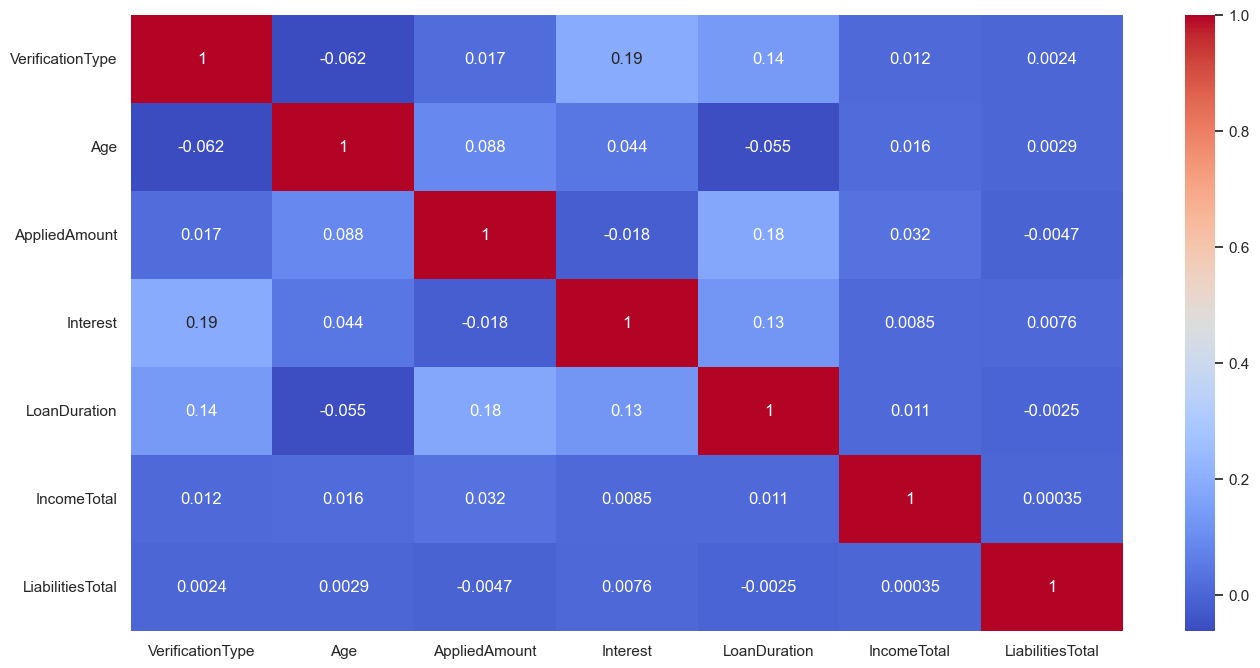

In [532]:
# lets produce Heat Map to check the correlation of the variables
# we can see that features are not correlated to each other. 

df_corr = df[['VerificationType', 'Age', 'AppliedAmount', 'Interest', 'LoanDuration','IncomeTotal', 'LiabilitiesTotal']][df.LoanStatus == 'Default']

sns.set(rc = {'figure.figsize': (16,8)})
sns.heatmap(df_corr.corr(), annot = True, fmt = '.2g', cmap = 'coolwarm');

In [579]:
# FEATURE ENGINEERING 
    
    ## Features Encoding
    ## Feature scaling
    ## Dimensionality Reduction using PCA
    ## Building Models

## FEATURE ENCODING 
## Let's divide our features to "Target" feature and "Independnt features" :
y = df.LoanStatus # Target Feature
x_corr = df[['VerificationType', 'Age', 'AppliedAmount', 'Interest', 'LoanDuration','IncomeTotal', 'LiabilitiesTotal']][df.LoanStatus == 'Default']
x = df.drop(columns = ['LoanStatus']) # Independent Features


In [580]:
# Lets perform categorical feature encoding 
LE = LabelEncoder()

# Target_feature (Dependent variable) Encoding
y = LE.fit_transform(y)

# independent_feature (variable) Encoding 
for feature in x.select_dtypes([object, bool]).columns:
    x[feature] = LE.fit_transform(x[feature])

In [581]:
# FEATURE SELECTION

## We will use correlation filter selection technique for our feature selection 
## Highly correlated features will be considered duplicated features while using the machine learning model, 
## so we should drop them(drop one and leave the another).

# A function to select highly correlated features.
def Correlation(dataset, threshold):
    correltated_features = set() # as a container of highly correlated features
    correlation_matrix = dataset.corr()
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                column_name = correlation_matrix.columns[i]
                correltated_features.add(column_name)
    
    if len(correltated_features) == 0:
        return "No correlation Exists > 0.8"
    else:
        return correltated_features

# let's selected features with a correlation factor > 0.8
Correlation(x, 0.8)


'No correlation Exists > 0.8'

In [585]:
# Step 1: Check for missing values
missing_values_index = x.isnull().sum().index
missing_values = x.isnull().sum().values

print("Columns in x  ->   Missing value count", end="\n")
print("-----------------------------------------")
for i in range(len(missing_values)):
    print(f"{missing_values_index[i]}--------> {missing_values[i]}")

Columns in x  ->   Missing value count
-----------------------------------------
NewCreditCustomer--------> 0
VerificationType--------> 0
Age--------> 0
Gender--------> 0
Country--------> 0
AppliedAmount--------> 0
Interest--------> 0
LoanDuration--------> 0
UseOfLoan--------> 0
Education--------> 0
MaritalStatus--------> 0
EmploymentStatus--------> 0
HomeOwnershipType--------> 0
IncomeTotal--------> 0
LiabilitiesTotal--------> 0


In [586]:
# Step 2: Impute missing values
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Step 3: Select features using SelectKBest
features = SelectKBest(mutual_info_classif, k=14)
Selected_features = features.fit_transform(x_imputed, y)

In [588]:
# FEATURE SCALING 
   ## We will use the standardScalar to scale our data 
    ## StandardScaler is used to resize the distribution of values so that the mean of the observed values 
    ## is 0 and the standard deviation is 1.

Standard_Scalar = StandardScaler()
Selected_features = Standard_Scalar.fit_transform(Selected_features)
pd.DataFrame(Selected_features).head()

In [601]:
# WE ARE READY TO START BUILDING OUR MODEL 
# We will use the Train Test Split Method for this project
X_train, X_test, y_train, y_test = train_test_split(Selected_features, y, random_state =100, train_size = 0.8)


#### We are developing three (3) models in this project
  - Logistic Regression
  - Decision Tree
  - Artificial Neural Network

In [614]:
#  1. LOGISTIC REGRESSION
LR = LogisticRegression()

# Next we fit the model into our data 
LR.fit(X_train, y_train)

# let's make our prediction
y_predict = LR.predict(X_test)

# accuracy_score of logistic Regression Model 
print(f"Accuracy score of prediction: {accuracy_score(y_test, y_predict):.2%}\n")

# ROC_AUC SCORE OF LR
print(f"Roc_Auc score of prediction: {roc_auc_score(y_test, y_predict):.2%}\n")

# Confusion Matrix
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_predict)}\n")

# Classification Report
print("Classification Report: \n", classification_report(y_test, y_predict))


Accuracy score of prediction: 64.18%

Roc_Auc score of prediction: 63.85%

Confusion Matrix:
 [[9222 4229]
 [4782 6924]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.69      0.67     13451
           1       0.62      0.59      0.61     11706

    accuracy                           0.64     25157
   macro avg       0.64      0.64      0.64     25157
weighted avg       0.64      0.64      0.64     25157



In [618]:
# 2. DECISION TREE MODEL 
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

# lets make our prediction  y_predict = LR.predict(X_test)
y_pred = dtree.predict(X_test)

# accuracy_score of logistic Regression Model 
print(f"Accuracy score of prediction: {accuracy_score(y_test, y_pred):.2%}\n")

# ROC_AUC SCORE OF LR
print(f"Roc_Auc score of prediction: {roc_auc_score(y_test, y_pred):.2%}\n")

# Confusion Matrix
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")

# Classification Report
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy score of prediction: 62.32%

Roc_Auc score of prediction: 62.17%

Confusion Matrix:
 [[8661 4790]
 [4688 7018]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.64      0.65     13451
           1       0.59      0.60      0.60     11706

    accuracy                           0.62     25157
   macro avg       0.62      0.62      0.62     25157
weighted avg       0.62      0.62      0.62     25157



In [620]:

# 3. Random Forest 

# Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression 
# problems. It builds decision trees on different samples and takes their majority vote for classification and 
# average in case of regression.

# One of the most important features of the Random Forest Algorithm is that it can handle the data set containing 
# continuous variables as in the case of regression and categorical variables as in the case of classification. 
# It performs better results for classification problems.


RFC = RandomForestClassifier()

# Let's fit the model on our data
RFC.fit(X_train, y_train)

# Let's make predictions
y_predict = RFC.predict(X_test)

# accuracy_score of logistic Regression Model 
print(f"Accuracy score of prediction: {accuracy_score(y_test, y_predict):.2%}\n")

# ROC_AUC SCORE OF LR
print(f"Roc_Auc score of prediction: {roc_auc_score(y_test, y_predict):.2%}\n")

# Confusion Matrix
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_predict)}\n")

# Classification Report
print("Classification Report: \n", classification_report(y_test, y_predict))




Accuracy score of prediction: 70.12%

Roc_Auc score of prediction: 69.54%

Confusion Matrix:
 [[10468  2983]
 [ 4535  7171]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74     13451
           1       0.71      0.61      0.66     11706

    accuracy                           0.70     25157
   macro avg       0.70      0.70      0.70     25157
weighted avg       0.70      0.70      0.70     25157



# End of the Model Development  